In [20]:
# cargar base de datos
import kagglehub

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt




# Download latest version
path = kagglehub.dataset_download("gpiosenka/coffee-bean-dataset-resized-224-x-224")

print("Path to dataset files:", path)

ConnectionError: HTTPSConnectionPool(host='www.kaggle.com', port=443): Max retries exceeded with url: /api/v1/datasets/view/gpiosenka/coffee-bean-dataset-resized-224-x-224 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x3b35651c0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install keras-tuner --quiet

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import keras_tuner as kt
import os #/kaggle/input/coffee-bean-dataset-resized-224-x-224

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios
train_dir = "/Users/juanluis/.cache/kagglehub/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224/versions/1/train"
test_dir = "/Users/juanluis/.cache/kagglehub/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224/versions/1/test"

# Generadores de datos con augmentación y normalización
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.18  # 18% para validación, 82% para entrenamiento
)

# Conjunto de entrenamiento (82%)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    seed=123
)

# Conjunto de validación (18%)
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    seed=123
)

# Generador de test (sin augmentación)
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False  # importante si necesitas predicciones alineadas con los archivos
)


Found 984 images belonging to 4 classes.
Found 216 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [6]:

  
def model_builder(input_shape=(224, 224, 3), num_classes=4):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    
    
    # Bloque 1 
    # capa convolucional 64 filtros
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    # convolucional 64 filtros
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    # Max Pooling 2*2
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Bloque 2 
    # capa convolucional 128 filtros
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    # capa convolucional 128 filtros
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    # Max Pooling 2x2 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # Bloque 3 
    # capa convolucional 64 filtros
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    # capa convolucional 64 filtros
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                                    activation='relu', padding='same'))
    
    # espaquetizacion del tensor 
    model.add(tf.keras.layers.Flatten())
    
    # Capas Densas 
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    
    # Capa de salida
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [7]:
print(train_data.class_indices)


{'Dark': 0, 'Green': 1, 'Light': 2, 'Medium': 3}


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3050 - loss: 2.6726 - val_accuracy: 0.4583 - val_loss: 1.3477
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6299 - loss: 1.0390 - val_accuracy: 0.8519 - val_loss: 0.3837
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8200 - loss: 0.4441 - val_accuracy: 0.7546 - val_loss: 0.5169
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8813 - loss: 0.3258 - val_accuracy: 0.9306 - val_loss: 0.2495
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9365 - loss: 0.2245 - val_accuracy: 0.9398 - val_loss: 0.1466


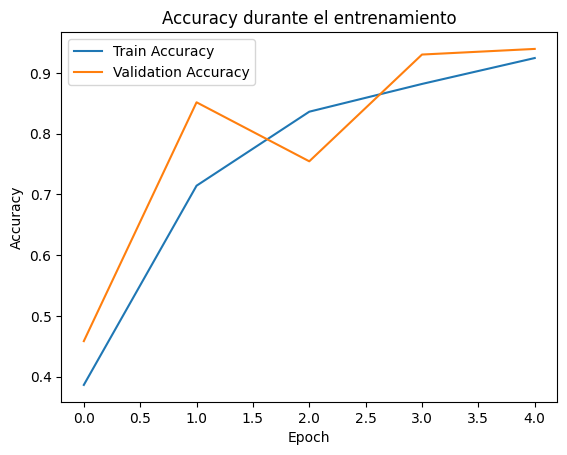

In [42]:


model = model_builder(input_shape=(224, 224, 3), num_classes=4)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    verbose=1
)

# Graficar accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
model.save("modelo/Toto_model.h5")


In [13]:
from tensorflow.keras.models import load_model

model = load_model('modelo/Toto_model.h5')


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones (probabilidades)
y_pred_probs = model.predict(test_data)

# Convertimos a clases predichas (índice de la probabilidad más alta)
y_pred = np.argmax(y_pred_probs, axis=1)

# Clases reales
y_true = test_data.classes


/Users/juanluis/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step


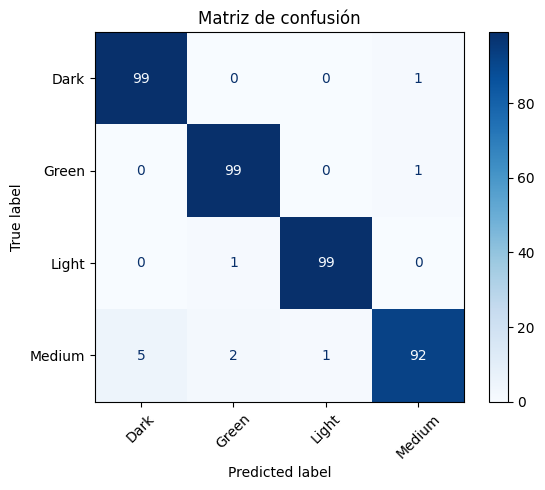

In [15]:

# Nombres de las clases (opcional pero recomendado)
class_names = list(test_data.class_indices.keys())

# Calcular y graficar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


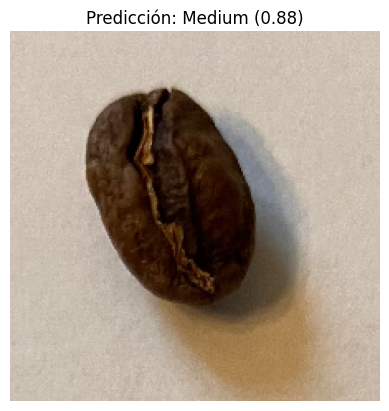

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


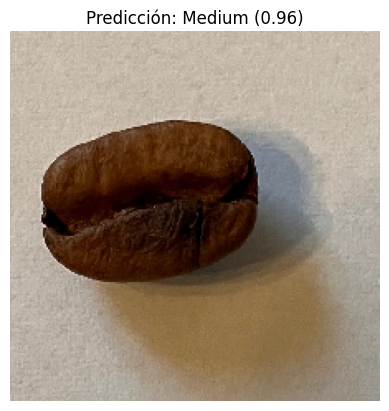

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


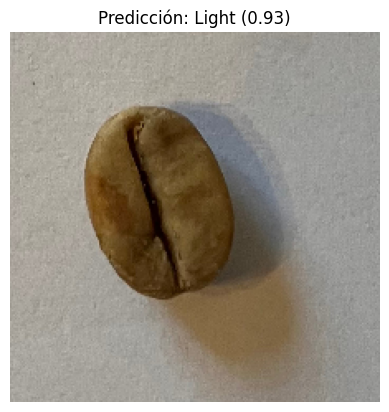

In [19]:
from tensorflow.keras.preprocessing import image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalización si tu modelo fue entrenado así
    return np.expand_dims(img_array, axis=0), img

# Lista de imágenes externas
image_files = ['cafe1.jpg', 'cafe2.jpg', 'cafe3.jpg']

# Procesar y predecir cada imagen
for file in image_files:
    img_array, original_img = load_and_preprocess_image(file)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Graficar
    plt.imshow(original_img)
    plt.title(f'Predicción: {class_names[predicted_class]} ({confidence:.2f})')
    plt.axis('off')
    plt.show()
